This notebook is part of my [Python data science curriculum](http://www.terran.us/articles/python_curriculum.html)

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Data

In [2]:
from sklearn.datasets import load_boston
skBoston = load_boston()

In [3]:
# sklearn data is in a format with precomputed X and y, which is not what we want.
Boston = pd.DataFrame(data= skBoston['data'],
                      columns= skBoston['feature_names'])
Boston['MEDV']=skBoston.target
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Statsmodels

## Model Fitting

In [4]:
from statsmodels.multivariate.pca import PCA

In [5]:
smpca = PCA(Boston,standardize=True)

## Scree Plot

<IPython.core.display.Javascript object>


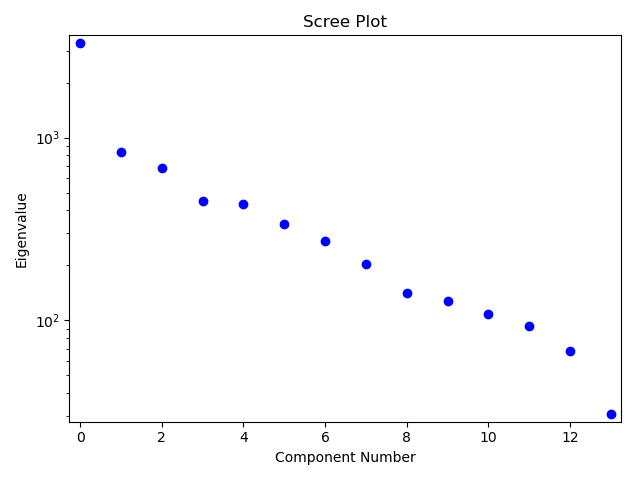

In [6]:
%matplotlib notebook
smpca.plot_scree();

This suggets that 1 component would be the right number.  Note that the vertical axis is the eigenvalue on a log scale, _not_ the more common proportion of variance explained.

## Biplot

No biplot for you!

## Loadings/Rotations

In [7]:
smpca.loadings.iloc[:,0:3]

,comp_00,comp_01,comp_02
CRIM,0.240962,-0.065950,0.393820
ZN,-0.245618,-0.147745,0.394760
INDUS,0.332027,0.126979,-0.065289
CHAS,-0.004989,0.410562,-0.125809
NOX,0.325298,0.254262,-0.046524
RM,-0.203014,0.434305,0.352838
AGE,0.297132,0.260158,-0.200950
DIS,-0.298328,-0.359005,0.156994
RAD,0.303431,0.031323,0.420101
TAX,0.324095,0.008978,0.344904


# H2O

Overall I'm not very pleased with the PCA implementation in H2O; it doesn't offer much functionality and the UI is awkward.

## Init

In [8]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_71"; Java(TM) SE Runtime Environment (build 1.7.0_71-b14); Java HotSpot(TM) 64-Bit Server VM (build 24.71-b01, mixed mode)
  Starting server from /Users/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/55/2417s3bs6s977dvsrs15x3n00000gp/T/tmpunlw44_o
  JVM stdout: /var/folders/55/2417s3bs6s977dvsrs15x3n00000gp/T/tmpunlw44_o/h2o_terran_started_from_python.out
  JVM stderr: /var/folders/55/2417s3bs6s977dvsrs15x3n00000gp/T/tmpunlw44_o/h2o_terran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 23 days
H2O cluster name:,H2O_from_python_terran_96nm83
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Data Loading

In [9]:
hbos = h2o.H2OFrame(Boston, destination_frame="Boston")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
h2o.ls()

,key
0,Boston


In [11]:
hbos

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


## Model Fitting

In [12]:
# In h2o, it is mandatory to state the number of components to keep - it does not just assume
# full rank if unspecified.
modpca = h2o.estimators.pca.H2OPrincipalComponentAnalysisEstimator(
    transform='standardize',k=9)

In [13]:
# It is mandatory to state which columns are to be used for x
modpca.train(x=list(range(hbos.ncol)),training_frame=hbos)

pca Model Build progress: |███████████████████████████████████████████████| 100%


/Users/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


In [14]:
modpca.varimp(use_pandas=True)

,,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,Standard deviation,2.55769,1.284347,1.160291,0.941489,0.922435,0.813827,0.734218,0.635248,0.527020
1,Proportion of Variance,0.46727,0.117825,0.096162,0.063314,0.060778,0.047308,0.038505,0.028824,0.019839
2,Cumulative Proportion,0.46727,0.585095,0.681257,0.744571,0.805349,0.852657,0.891163,0.919987,0.939826


## Scree Plot

In [15]:
# Haha, no
try:
    modpca.screeplot()
except Exception as e:
    print(repr(e))

KeyError('server',)


So I guess we're going to do it the manual way.

In [16]:
vi = modpca.varimp(use_pandas=True).transpose()
# The column headers are now in the first row, so put that row back on the columns.
vi.columns=vi.iloc[0,:]
vi.drop('',inplace=True)
# and, as always, remove the index before using with Altair
vi.reset_index(inplace=True)
vi.head()

,index,Standard deviation,Proportion of Variance,Cumulative Proportion
0,pc1,2.55769,0.46727,0.46727
1,pc2,1.28435,0.117825,0.585095
2,pc3,1.16029,0.0961625,0.681257
3,pc4,0.941489,0.0633144,0.744571
4,pc5,0.922435,0.0607776,0.805349


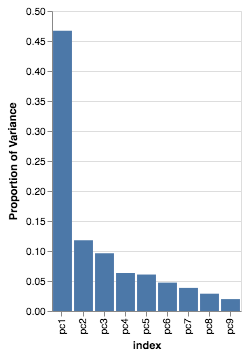

In [17]:
alt.Chart(vi).mark_bar().encode(
   x='index',y='Proportion of Variance').interactive()

This suggests that reasonable choices would be 1 or 3 components to retain.

## Loadings/Rotations

In [18]:
modpca.rotation().as_data_frame().iloc[:,0:4]

,,pc1,pc2,pc3
0,CRIM,-0.240962,-0.065950,-0.393820
1,ZN,0.245618,-0.147745,-0.394760
2,INDUS,-0.332027,0.126979,0.065289
3,CHAS,0.004989,0.410562,0.125809
4,NOX,-0.325298,0.254262,0.046524
5,RM,0.203014,0.434305,-0.352838
6,AGE,-0.297132,0.260158,0.200950
7,DIS,0.298328,-0.359005,-0.156994
8,RAD,-0.303431,0.031323,-0.420101
9,TAX,-0.324095,0.008978,-0.344904


# Comparison to R results

(ignore sign changes; those are arbitrary)
```
> prcomp(MASS::Boston,scale=T)$rotation[,1:3]
                 PC1          PC2          PC3
crim     0.242284451 -0.065873108  0.395077419
zn      -0.245435005 -0.148002653  0.394545713
indus    0.331859746  0.127075668 -0.066081913
chas    -0.005027133  0.410668763 -0.125305293
nox      0.325193880  0.254276363 -0.046475549
rm      -0.202816554  0.434005810  0.353406095
age      0.296976574  0.260303205 -0.200823078
dis     -0.298169809 -0.359149977  0.157068710
rad      0.303412754  0.031149596  0.418510334
tax      0.324033052  0.008851406  0.343232194
ptratio  0.207679535 -0.314623061  0.000399092
black   -0.196638358  0.026481032 -0.361375914
lstat    0.311397955 -0.201245177 -0.161060336
medv    -0.266636396  0.444924411  0.163188735
```